### Linear (least squares) regression:

 **Problem:** We are given data $(\mathbf{x}_i, y_i)_{i=1}^n$ where $\mathbf{x}_i\in \mathbb{R}^d$ and $y_i\in \mathbb{R}$ and we want to find an affine linear function $$f(\mathbf{x}) = \beta_0 + \sum_{j=1}^d \beta_j x_j$$ such that
 $$
 \sum_{i=1}^n \left( y_i - f(\mathbf{x}_i) \right)^2 
 $$ is minimized.

We saw in class that this is equivalent to
$$
\arg \min_{\boldsymbol{\beta}\in \mathbb{R}^{d+1}} \left\| \mathbf{y} - A \boldsymbol{\beta}\right\|^2.
$$
Here $A \in \mathbb{R}^{n\times (d+1)}$ is the matrix
$$
A = \begin{bmatrix}
1 & \mathbf{x}_1^T\\
1 & \mathbf{x}_2^T\\
\vdots& \vdots\\
1& \mathbf{x}_n^T
\end{bmatrix}.
$$

We also know that if $U = \text{col}(A)$ is the column space of $A$ (i.e. the span of the columns of $A$), then $U$ is a linear subspace of $\mathbb{R}^n$ and 
$$
\arg\min_{\mathbf{p}\in U} \|\mathbf{y} - \mathbf{p}\|^2 = \mathbf{p}^*:= \text{proj}_U(\mathbf{y}).
$$

Also, the vector $\mathbf{p}^*$ satisfies the following orthogonality property:
$$
\langle \mathbf{y} - \mathbf{p}^*, \mathbf{u}\rangle = 0,\qquad\forall \mathbf{u}\in U.
$$
In particular, that implies $A^T( \mathbf{y}- \mathbf{p}^*) = \boldsymbol0$, as we saw in class.

This implies that 
$$
A\boldsymbol\beta = \mathbf{p}^*\qquad\text{and}\qquad A^T \mathbf{y} = A^T \mathbf{p}^*.
$$

Written another way, this is 
$$
A^T\mathbf{y} = A^T A \boldsymbol{\beta},
$$ and provided that $A^TA\in \mathbf{R}^{(d+1)\times (d+1)}$ is invertible then
$$
\boldsymbol\beta = (A^TA)^{-1} A^T \mathbf{y}.
$$

Let's use this to compute some linear regression problems.

#### Example 1

We generate synthetic data where $x_i\in\mathbb{R}$ and $y_i\in \mathbb{R}$ with:
$$
{x}_i \overset{\text{i.i.d.}}\sim \text{Unif}[0,10] 
$$
and 
$$
y_i  = -1 + 2x_i + \varepsilon_i,\qquad\text{where}\quad \varepsilon_i\sim \mathcal{N}(0,\sigma^2),
$$ and the noise $\varepsilon_i$ are independent of each other and of $x_i$. 

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

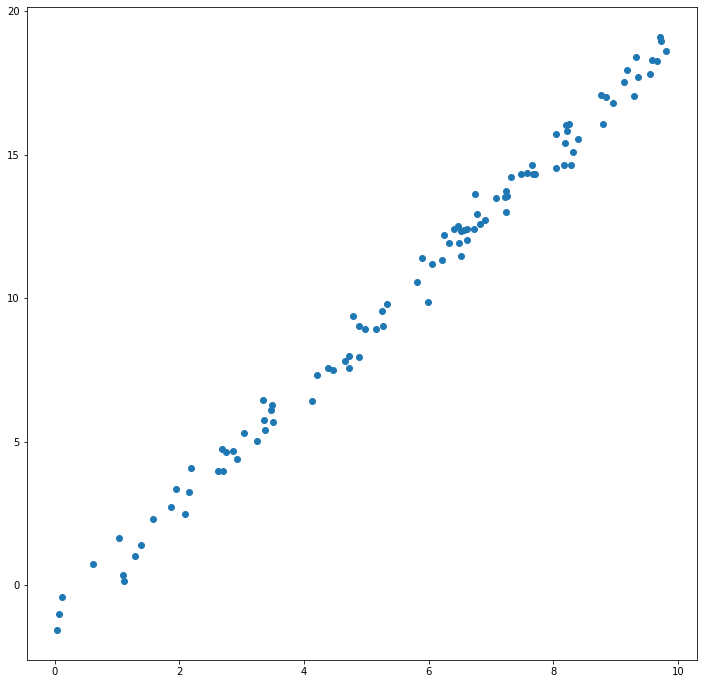

In [3]:
n = 100
maxVal = 10
sigma2 = .5
plt.figure(figsize = (12,12))
x = [[ 1, np.random.uniform(0,maxVal)] for j in range(n)]
y = [-1+2*x[j][1] + np.random.normal(0,sigma2) for j in range(n)]
plt.scatter([t[1] for t in x],y)

In [4]:
A = np.stack(x, axis = 0)
beta = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(A),A)), np.transpose(A)), y)
print(beta)

[-1.17812885  2.0314174 ]


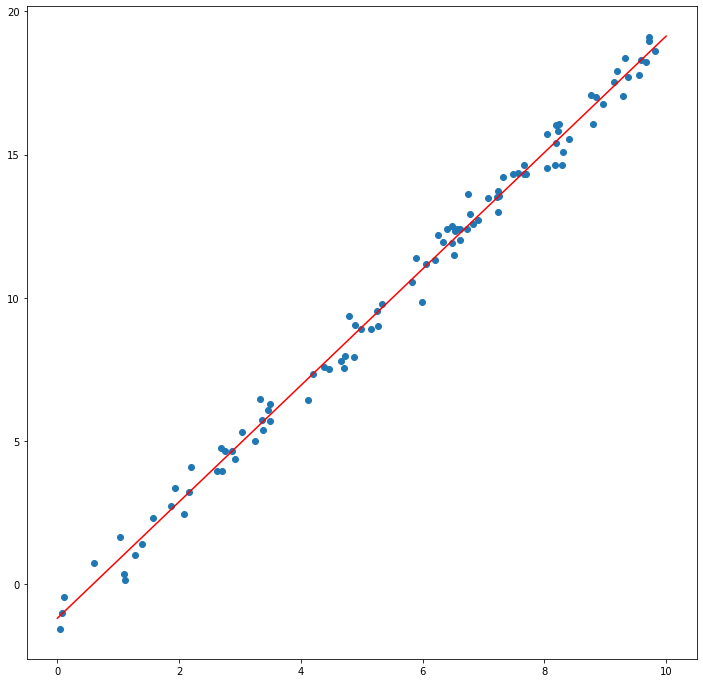

In [6]:
plt.figure(figsize = (12,12))
plt.scatter([t[1] for t in x], y)

plt.plot( [0,maxVal], [beta[0], beta[0]+beta[1]*maxVal],color = 'red')

#### Example 2

Synthetic data again, but this time we have 
$$
\mathbf{x}_i \overset{\text{i.i.d.}}\sim \text{Unif}[0,1]\times [0,5]
$$
and 
$$
y_i = 1  - 3x_{i,1} +x_{i,2} + \varepsilon_i,\qquad \varepsilon_i \sim \mathcal{N}(0,\sigma^2).
$$

Text(0.5, 1.0, 'plot of $x_2$ against $y$')

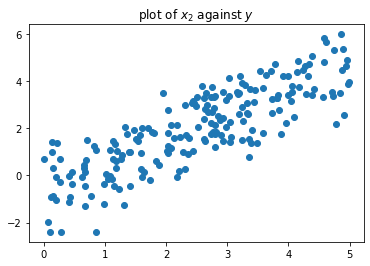

In [7]:
n = 200
maxVal1 = 1
maxVal2 = 5
sigma2 = .5
x = [[ 1, np.random.uniform(0,maxVal1), np.random.uniform(0,maxVal2)] for j in range(n)]
y = [1-3*t[1]+t[2] + np.random.normal(0,sigma2) for t in x]
plt.scatter([t[2] for t in x],y)
plt.title('plot of $x_2$ against $y$')

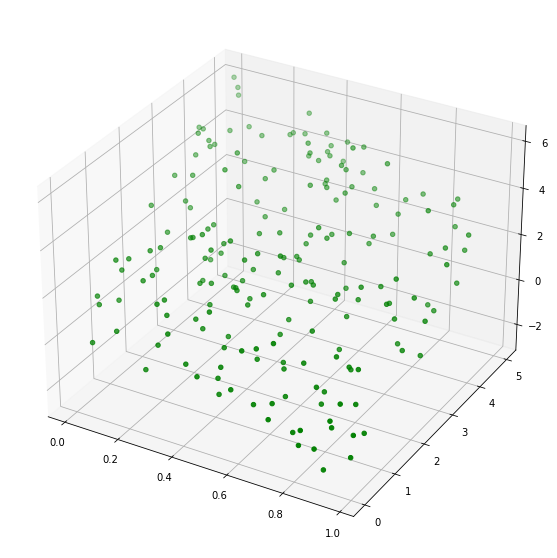

In [37]:
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D([t[1] for t in x], [t[2] for t in x], y, color = "green")


In [8]:
A = np.stack(x, axis = 0)
beta = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(A),A)), np.transpose(A)), y)
print(beta)

[ 0.99975659 -2.95251147  1.003155  ]


#### Example 3:

Here is a non-linear example. 

Suppose that $x_i$ are real-valued and uniform over the interval $[0,4]$.

Suppose that 
$$
y_i = -1+ 2x_i - \frac{1}{2} x_i^2  + \varepsilon_i \qquad\text{where}\quad \varepsilon_i\sim \mathcal{N}(0,\sigma^2).
$$

Below, we can see a clear curve in the data.

Text(0.5, 1.0, 'plot of $x$ against $y$')

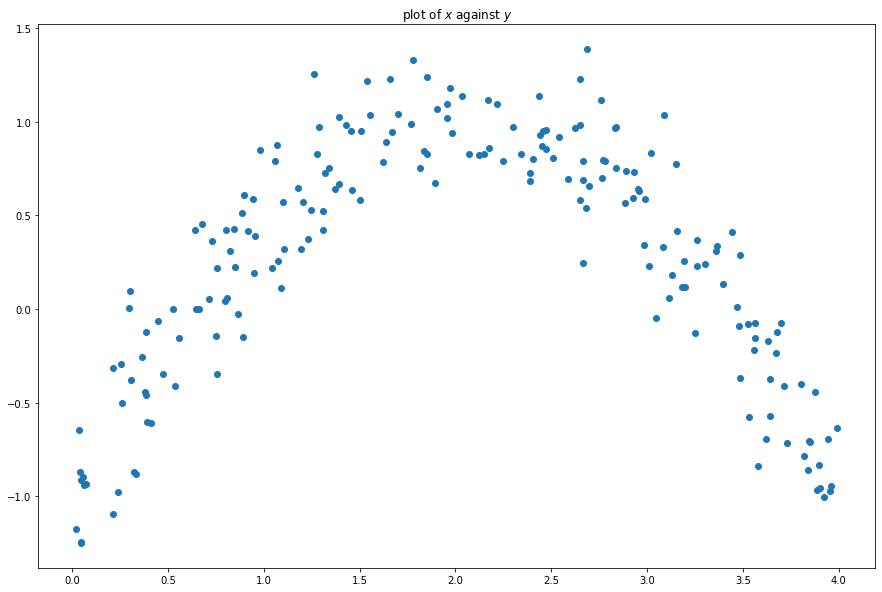

In [9]:
n = 200
maxVal = 4
sigma2 = .25
x = [[ 1, np.random.uniform(0,maxVal)] for j in range(n)]
y = [-1+2*t[1] - t[1]**2/2 + np.random.normal(0,sigma2) for t in x]
plt.figure(figsize = (15,10))
plt.scatter([t[1] for t in x],y)
plt.title('plot of $x$ against $y$')

How do we use linear regression to find the coefficients in this non-linear function $f$?
That is we would guess that
$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2,
$$ which is not an affine function.

The "trick" is to create new data points out of the $x_i$'s:
$$
\mathbf{z}_i = \begin{bmatrix}
x_i\\
x_i^2
\end{bmatrix},
$$
and now
$$
f(x) = g(\mathbf{z}) = \beta_0 + \beta_1 z_1 + \beta_2 z_2.
$$

In [10]:
z = [[1, t[1], t[1]**2] for t in x]
A = np.stack(z, axis = 0)
beta = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(A),A)), np.transpose(A)), y)
print(beta)

[-1.0947909   2.06037471 -0.50742778]


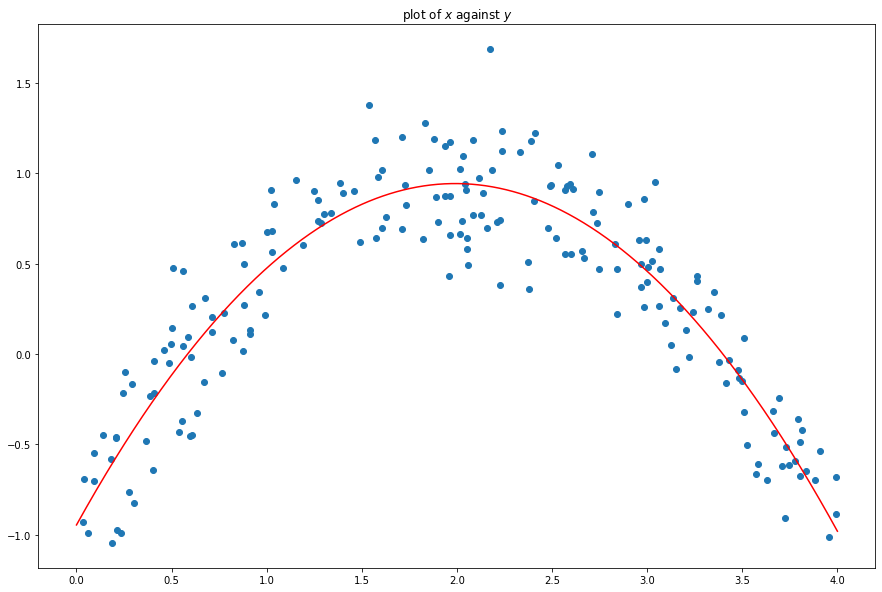

In [53]:
plt.figure(figsize = (15,10))
plt.scatter([t[1] for t in x],y)
plt.title('plot of $x$ against $y$')
u = np.linspace(0,maxVal,1000)
plt.plot(u, [beta[0] + beta[1]*s + beta[2]* (s**2) for s in u], color = 'r')

#### Example 4

What happens if we want to approximate the using a function
$$
y\approx f(x) = cx^\alpha
$$
where $c,\alpha>0$?

The trick here is to transform the data again, but this time we aslo transform $y$!

$$
\log (y) \approx \log f(x) = \log c + \alpha \log x.
$$

Text(0.5, 1.0, 'plot of $x$ against $y$')

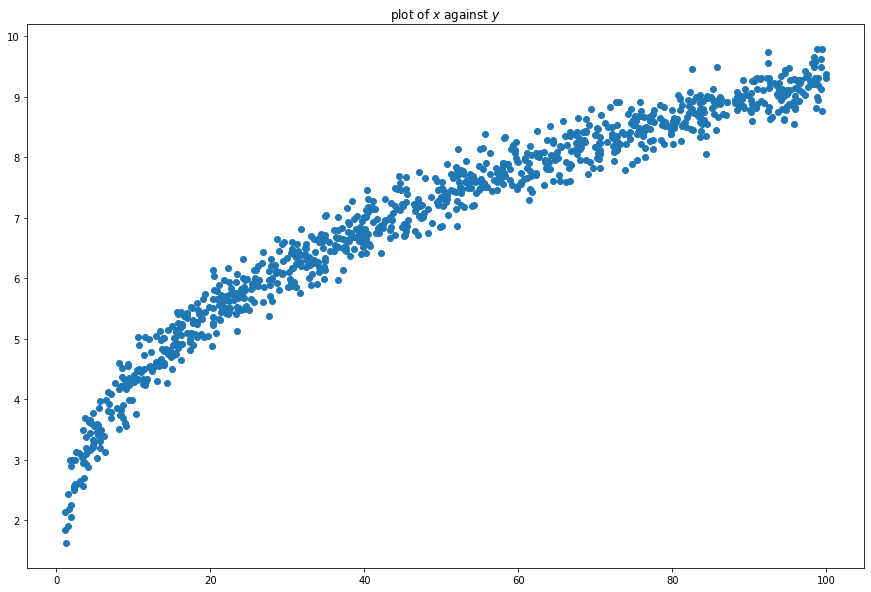

In [57]:
n = 1000
maxVal = 100
sigma2 = .25
x = [[ 1, np.random.uniform(1,maxVal)] for j in range(n)]
y = [2*np.power(t[1],1/3) + np.random.normal(0,sigma2) for t in x]
plt.figure(figsize = (15,10))
plt.scatter([t[1] for t in x],y)
plt.title('plot of $x$ against $y$')

In [61]:
z = [[1, np.log(t[1])] for t in x]
yy = [np.log(t) for t in y]
A = np.stack(z, axis = 0)
beta = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(A),A)), np.transpose(A)), yy)
print(beta)

[0.68338278 0.33558787]


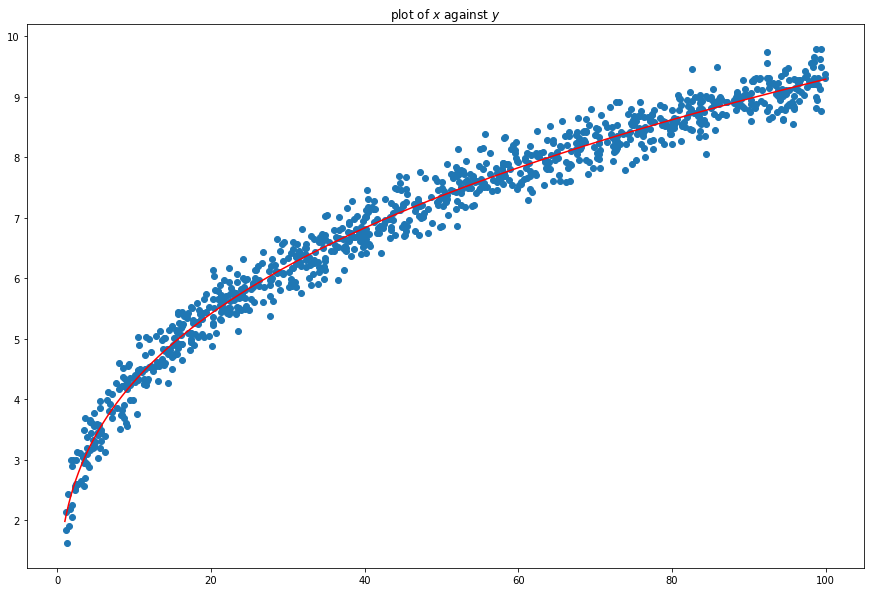

In [65]:
plt.figure(figsize = (15,10))
plt.scatter([t[1] for t in x],y)
plt.title('plot of $x$ against $y$')
u = np.linspace(1,maxVal,1000)
plt.plot(u, [np.exp(beta[0])* s**beta[1] for s in u], color = 'r')